In [7]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [8]:
crossval_long = cvc.CrossValidation(
                        ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv',
                        resolve_US_states = True,
                        FinalDateFromDB = True,
                        FinalDateExtendWithShiftdays = True)

In [9]:
crossval_long.LoadCVResults('cv_longrun_200604.csv')

# loading CV results from "cv_longrun_200604.csv"


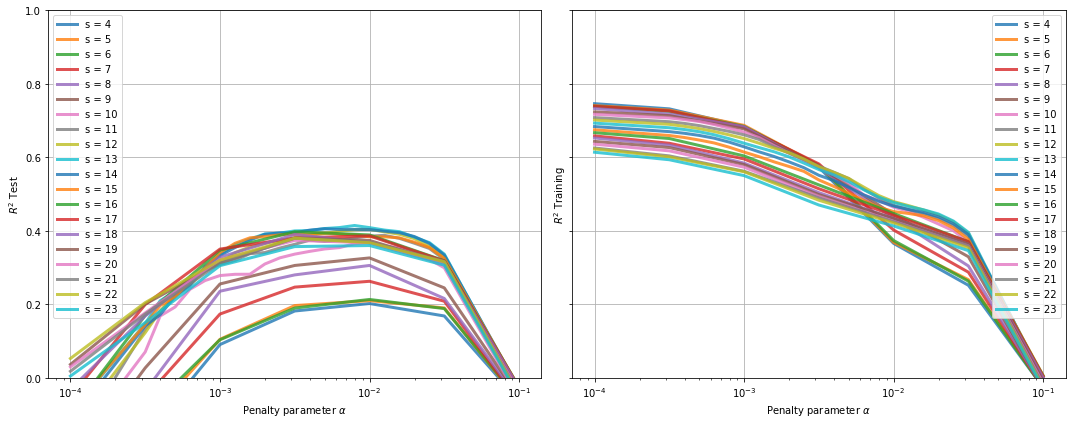

In [10]:
crossval_long.PlotCVresults()

In [11]:
crossval_long.ProcessCVresults().sort_values(by = ['R2 Test Avgd','R2 Test Weighted'], ascending = False).head(10)

,shiftdays,alpha,Loglike Test Avgd,Loglike Test Avgd Std,Loglike Training Avgd,Loglike Training Avgd Std,R2 Test Avgd,R2 Test Avgd Std,R2 Training Avgd,R2 Training Avgd Std,RSS Training Sum,RSS Test Sum,NVar Training Sum,NVar Test Sum,Test Sample Size,Training Sample Size,RSS per datapoint Training,RSS per datapoint Test,R2 Training Weighted,R2 Test Weighted
132,13,0.007943,-182.193949,53.849723,-1544.024918,58.187660,0.407307,0.154836,0.492135,0.014935,148710.971216,18675.711511,292858.052357,31918.558679,91080,819720,0.181417,0.205047,0.492208,0.414895
130,13,0.006310,-183.540485,59.179521,-1489.520642,59.654222,0.404926,0.147457,0.512060,0.014096,142875.574845,18821.790694,292852.943292,31863.303892,91080,819720,0.174298,0.206651,0.512125,0.409296
89,12,0.010000,-180.111880,61.900444,-1557.665021,67.901924,0.404503,0.150561,0.479923,0.015775,351594.724066,43706.657072,675999.897348,73365.794776,208460,1876140,0.187403,0.209664,0.479889,0.404264
112,13,0.010000,-182.250516,63.167304,-1583.029892,65.370900,0.404181,0.146842,0.477403,0.014386,357081.637794,43939.113640,683325.692132,74358.910366,212520,1912680,0.186692,0.206753,0.477436,0.409094
128,13,0.005012,-182.704859,59.433197,-1426.525413,56.194147,0.402650,0.169345,0.534048,0.011849,136444.573350,18917.102381,292853.981147,31876.983621,91080,819720,0.166453,0.207698,0.534087,0.406559
109,12,0.007943,-180.355817,61.498112,-1514.502620,65.513077,0.402475,0.152316,0.496456,0.014965,145890.859656,18751.181648,289712.974380,31422.359325,89340,804060,0.181443,0.209886,0.496430,0.403254
151,14,0.005012,-186.092949,62.014336,-1486.722766,59.945190,0.401585,0.154036,0.518736,0.012885,142383.445589,19164.236754,295881.138261,32266.176069,92820,835380,0.170442,0.206467,0.518782,0.406058
115,13,0.012589,-184.796968,57.072083,-1610.791220,59.986976,0.400302,0.131042,0.466745,0.013281,156165.401156,19071.844869,292859.118765,31915.783303,91080,819720,0.190511,0.209397,0.466756,0.402432
149,14,0.003981,-185.728677,62.375354,-1432.383799,62.687073,0.398993,0.148860,0.537117,0.012325,136951.125161,19261.428165,295876.235974,32226.683932,92820,835380,0.163939,0.207514,0.537134,0.402314
138,14,0.012589,-186.854437,63.605098,-1650.880716,64.151997,0.398707,0.119816,0.458496,0.011428,160215.796262,19330.593343,295872.300618,32181.522569,92820,835380,0.191788,0.208259,0.458497,0.399326


In [12]:
crossval_long.ProcessCVresults().to_csv('cvres_200604.csv',index = False, header = False, sep = ' ')

In [13]:
crossval_long.ComputeFinalModels(modelparameters=[(13,0.007943)])

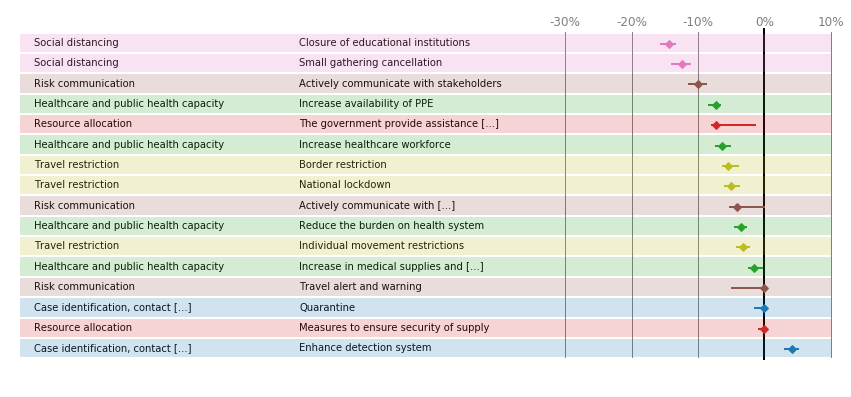

In [15]:
crossval_long.PlotMeasureListSorted(drop_zeros=True, figsize = (15,6), entryheight=.8, rescale = True)

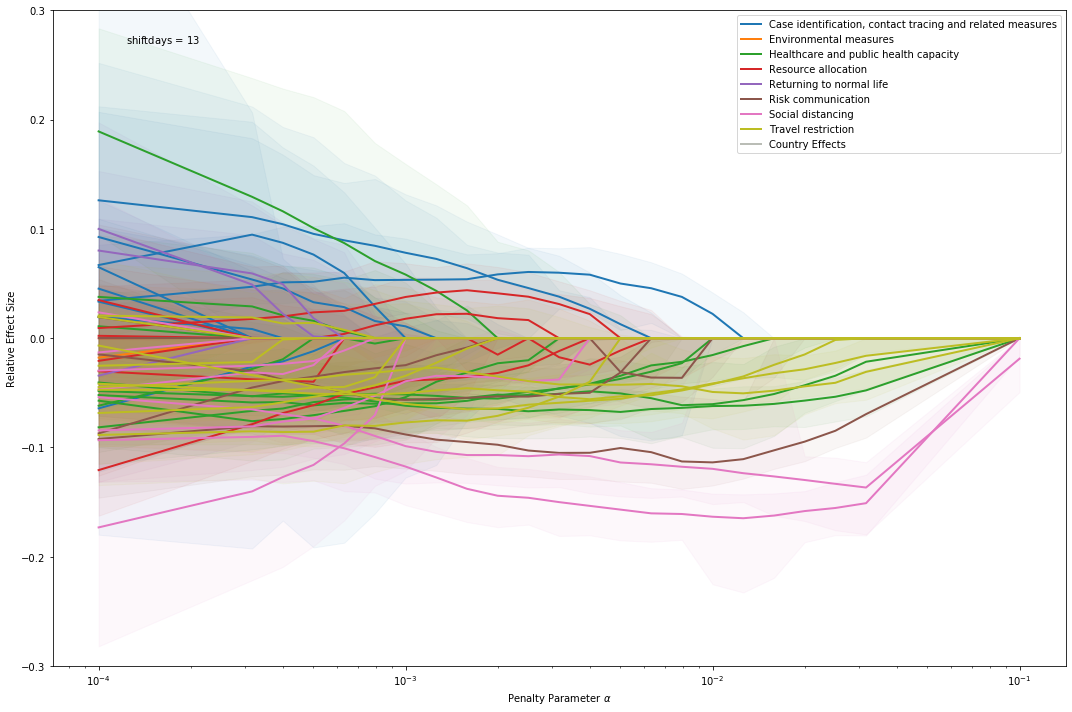

In [16]:
crossval_long.PlotCVAlphaSweep(shiftdays = [13], ylim = (-.3,.3))

In [17]:
crossval_long.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measure_effects.csv')

In [18]:
crossval_long.FinalMeasureEffects()

,Measure_L1,Measure_L2,median,low,high
ClosureOfEducationalInstitutions,Social distancing,Closure of educational institutions,-0.143474,-0.155055,-0.135037
SmallGatheringCancellation,Social distancing,Small gathering cancellation,-0.124842,-0.139615,-0.111650
ActivelyCommunicateWithStakeholders,Risk communication,Actively communicate with stakeholders,-0.099387,-0.114324,-0.087950
IncreaseAvailabilityOfPpe,Healthcare and public health capacity,Increase availability of PPE,-0.073015,-0.083338,-0.067451
TheGovernmentProvideAssistanceToVulnerablePopulations,Resource allocation,The government provide assistance to vulnerabl...,-0.072850,-0.079382,-0.013752
IncreaseHealthcareWorkforce,Healthcare and public health capacity,Increase healthcare workforce,-0.063719,-0.072873,-0.051540
BorderRestriction,Travel restriction,Border restriction,-0.055247,-0.063136,-0.039486
NationalLockdown,Travel restriction,National lockdown,-0.050539,-0.060085,-0.038903
ActivelyCommunicateWithHealthcareProfessionals,Risk communication,Actively communicate with healthcare professio...,-0.041095,-0.052160,0.000000
ReduceTheBurdenOnHealthSystem,Healthcare and public health capacity,Reduce the burden on health system,-0.035061,-0.044770,-0.027391
